In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("Advertising.csv")
df.drop("Unnamed: 0", axis=1,inplace=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
X=df.drop(['sales'],axis=1)
Y=df.sales
lr = LinearRegression()
model1=lr.fit(X,Y)
ypred1 = model1.predict(X)
print("R-squared: {0}".format(metrics.r2_score(Y,ypred1)))

R-squared: 0.8972106381789522


**Assumption 1:**<br>
The Dependent variable and Independent variable must have a linear relationship.

**How to Check?**<br>
A simple pairplot of the dataframe can help us see if the Independent variables exibit linear relationship with the Dependent Variable.

**How to Fix?**<br>
To fix non-linearity, one can either do log transformation of the Independent variable log(X) or other non-linear transformations like √X or X^2.

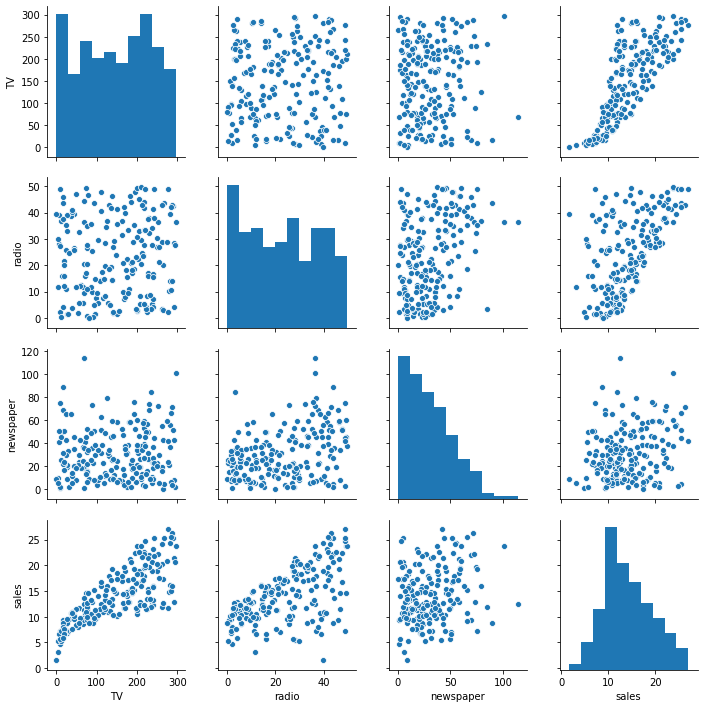

In [5]:
sns.pairplot(df)

None of the Independent variables show complete linearity with respect to the dependent variable. An equation of first order will not be able to capture the non-linearity completely which would result in a sub-par model. In order to square the variables and fit the model, we will use Linear Regression with Polynomial Features.

In [6]:
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 2) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, Y) 
X_poly = sm.add_constant(X_poly)
results = sm.OLS(Y,X_poly).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     1543.
Date:                Mon, 28 Oct 2019   Prob (F-statistic):          1.72e-172
Time:                        22:00:18   Log-Likelihood:                -183.14
No. Observations:                 200   AIC:                             386.3
Df Residuals:                     190   BIC:                             419.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0848      0.239     21.279      0.0

**Assumption 2:**<br>
No Autocorrelation in residuals.

**How to Check?**<br>
Use Durbin-Watson Test. <br>DW = 2 would be the ideal case here (no autocorrelation) <br>0 < DW < 2 -> positive autocorrelation <br> 2 < DW < 4 -> negative autocorrelation<br>
statsmodels' linear regression summary gives us the DW value amongst other useful insights.

**How to Fix?**<br>
* Add a column thats lagged with respect to the Independent variable
* Center the Variable (Subtract all values in the column by its mean).

The DW (Durbin-Watson) value is 2.136 (Taken from the results.summary() section above) which seems to be very close to the ideal case.

**Assumption 3:**<br>
No Heteroskedasticity.

**How to Check?**<br>
Residual vs Fitted values plot can tell if Heteroskedasticity is present or not.<br>If the plot shows a funnel shape pattern, then we say that Heteroskedasticity is present.<br>

**How to fix?**<br>
We could do a non linear transformation of the dependent variable such as log(Y) or √Y. Also, you can use weighted least square method to tackle heteroskedasticity.

NameError: name 'ypred2' is not defined

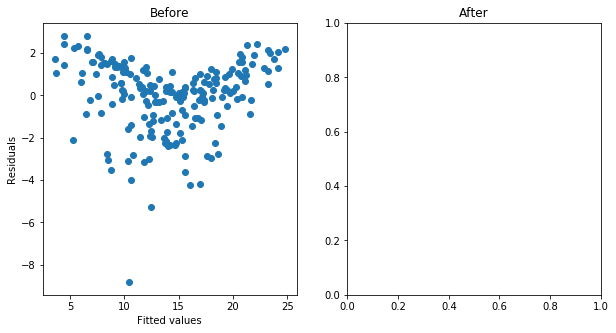

In [7]:
plt.subplots(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Before")
plt.scatter(ypred1, (Y-ypred1))
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

plt.subplot(1,2,2)
plt.title("After")
plt.scatter(ypred2, (Y-ypred2))
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

Here, we have plots of Residuals vs Fitted values for both **Before** and **After** working on Assumptions.
We dont see a funnel like pattern in the After section, so no heteroskedacity.

**Assumption 4:**<br>
No Perfect Multicollinearity.

**How to Check?**<br>
In case of very less variables, one could use heatmap, but that isn't so feasible in case of large number of columns.<br>
Another common way to check would be by calculating VIF (Variance Inflation Factor) values.<br> If VIF=1, Very Less Multicollinearity<br>VIF<5, Moderate Multicollinearity<br>VIF>5 , Extreme Multicollinearity (This is what we have to avoid)

**How to fix?**<br>
The Variables with high Multicollinearity can be removed altogether, or if you can find out which 2 or more variables have high correlation with each other, you could simply merge these variables into one. Make sure that VIF < 5.

In [ ]:
# Function to calculate VIF
def calculate_vif(data):
    vif_df = pd.DataFrame(columns = ['Var', 'Vif'])
    x_var_names = data.columns
    for i in range(0, x_var_names.shape[0]):
        y = data[x_var_names[i]]
        x = data[x_var_names.drop([x_var_names[i]])]
        r_squared = sm.OLS(y,x).fit().rsquared
        vif = round(1/(1-r_squared),2)
        vif_df.loc[i] = [x_var_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis = 0, ascending=False, inplace=False)

In [ ]:
X=df.drop(['sales'],axis=1)
calculate_vif(X)

Independent Variables seem to have Moderate VIF. So, no action needed here.

**Assumption 5:**<br>
Residuals must be normally distributed.

**How to Check?**<br>
Use Distribution plot on the residuals and see if it is normally distributed.

**How to Fix?**<br>
If the Resiudals are not normally distributed, non–linear transformation of the dependent or independent variables can be tried.

In [ ]:
plt.subplots(figsize=(8,4))

plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(Y-ypred1 , fit=norm);
plt.xlabel('Residuals')

plt.subplot(1,2,2)
plt.title("After")
sns.distplot(Y-ypred2 , fit=norm);
plt.xlabel('Residuals')

'Before' section shows a slight shift in the distribution from normal distribution, whereas 'After' section is almost aligned with normal distribution.<br>
Another way how we can determine the same is using Q-Q Plot (Quantile-Quantile)

In [ ]:
plt.subplots(figsize=(8,4))

plt.subplot(1,2,1)
stats.probplot(Y-ypred1, plot=plt)

plt.subplot(1,2,2)
stats.probplot(Y-ypred2, plot=plt)
plt.show()

In the 'Before' section , you will see that the Residual Quantiles dont exactly follow the straight line like it should , which means that the distribution isn't normal.<br> Whereas After working on assumption validation, we can see that the Residual Quantiles are following a straight line , meaning the distribution is normal.

In [ ]:
plt.subplots(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Before")
plt.plot(Y,Y, color="red")
plt.scatter(ypred1, Y)
plt.xlabel("Fitted values")
plt.ylabel("Actuals")

plt.subplot(1,2,2)
plt.title("After")
plt.plot(Y,Y, color="red")
plt.scatter(ypred3, Y)
plt.xlabel("Fitted values")
plt.ylabel("Actuals")

In the above plots we can see the Actual vs Fitted values for Before and After assumption validations. <br> More than 98%+ Fitted values agree with the actual values.

### Conclusion ###
We have now validated that all the Assumptions of Linear Regression are taken care of and we can safely say that it will deliver good results.<br> So, basically if your Linear Regression model is giving sub-par results, make sure that these Assumptions are validated and if you have fixed your data to fit these assumptions, then your model will surely see improvements.